In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
os.chdir(os.path.expanduser("/home/kurt/Documents/agnboost/"))

from agnboost import dataset, model
from astropy.table import Table, Column, vstack
import numpy as np
import gzip
import pickle

In [7]:
sim_table = Table.read('/home/kurt/Documents/cigale/mega_mock_big/models-block-0.fits', format='fits')

#sim_table.write('/home/kurt/Documents/agnboost/data/models.fits')

model_path = '/home/kurt/Documents/agnboost/data/models.fits'

with gzip.open(model_path + '.gz', 'wb') as f:
    pickle.dump(sim_table, f)

In [8]:
#catalog = dataset.Catalog(path='data/raw/megav0.2_cigale_hasz_fized.txt', delimiter = " ", summarize = False)#, bands_file='allowed_bands.json')

sim_table = Table.read('/home/kurt/Documents/cigale/mega_mock_big/models-block-0.fits', format='fits')


sim_df = sim_table.to_pandas()
sim_df.replace([np.inf, -np.inf], np.nan, inplace=True)

sim_df.dropna(axis = 0, how = 'any', inplace = True)
sim_df.reset_index(drop=True, inplace = True)
sim_sampled_df = sim_df.sample( n = 10**3 ).reset_index(drop = True)
sim_sampled_df.to_csv('/home/kurt/Documents/agnboost/data/cigale_mock_small.csv', sep = ',', index = False)

#catalog = dataset.Catalog(path='/home/kurt/Documents/cigale/mega_mock_big/models-block-0.fits', delimiter = " ", summarize = False)#, bands_file='allowed_bands.json')
#catalog = dataset.Catalog(data = sim_sampled_df, delimiter = " ", summarize = False)#, bands_file='allowed_bands.json')

In [6]:
catalog.split_data(test_size = 0.2, val_size = 0.2)

(Index([5026, 9881, 3214, 6504, 9875, 9281, 2483, 3696, 5883, 5626,
        ...
        3736, 2227, 4241, 1899, 1338, 5910, 6894, 2451, 3287, 4623],
       dtype='int64', length=6000),
 Index([2275, 4801, 6104, 7938,  279, 8527, 4978, 1809, 3841, 8796,
        ...
        2769, 6937, 8126, 8737, 1756, 4884, 7914, 3924, 1333, 6048],
       dtype='int64', length=2000),
 Index([3669,  622, 2069,  345, 5354, 6687, 4439, 7610, 9778, 4677,
        ...
        8070, 4774, 9140, 4036, 9271, 8598, 4280, 4462, 2419, 3079],
       dtype='int64', length=2000))

In [1]:
catalog.data.iloc[catalog.trainval_indices].shape

NameError: name 'catalog' is not defined

In [106]:
data = catalog.get_split_df(split_type="train", include_features = True, include_target = 'agn.fracAGN', return_DMatrix = True)

In [107]:
print(data)

In [46]:
mega_catalog = dataset.Catalog(path='data/raw/megav0.2_cigale_hasz_fized.txt', delimiter = " ", summarize = False)#, bands_file='allowed_bands.json')

mega_catalog.sn_cut(columns = {'jwst.miri.F770W':'jwst.miri.F770W_err',
                                  'jwst.miri.F2100W': 'jwst.miri.F2100W_err',
                                   'jwst.miri.F1500W': 'jwst.miri.F1500W_err'
                                  }, 
                        threshold = 3.0,
                       inplace = True)

mega_catalog.drop_nan(inplace = True)

2025-05-22 15:11:04,387 - AGNBoost.Catalog - WARNING - Warning: Column jwst.nircam.F115W contains non-positive values. Setting them to NaN for log calculation.
2025-05-22 15:11:04,388 - AGNBoost.Catalog - WARNING - Warning: Column jwst.nircam.F150W contains non-positive values. Setting them to NaN for log calculation.
2025-05-22 15:11:04,389 - AGNBoost.Catalog - WARNING - Warning: Column jwst.nircam.F200W contains non-positive values. Setting them to NaN for log calculation.
2025-05-22 15:11:04,390 - AGNBoost.Catalog - WARNING - Warning: Column jwst.nircam.F410M contains non-positive values. Setting them to NaN for log calculation.
2025-05-22 15:11:04,391 - AGNBoost.Catalog - WARNING - Warning: Column jwst.miri.F1500W contains non-positive values. Setting them to NaN for log calculation.
2025-05-22 15:11:04,391 - AGNBoost.Catalog - WARNING - Warning: Column jwst.miri.F2100W contains non-positive values. Setting them to NaN for log calculation.


Current working directory: /home/kurt/Documents/agnboost
Looking for bands file at: /home/kurt/Documents/agnboost/allowed_bands.json
[INFO] Loaded bands file metadata: This file contains the allowed photometric bands for JWST
[INFO] Loaded 11 allowed bands from agnboost/allowed_bands.json
[INFO] Attempting to load file with delimiter: ' '
[INFO] Successfully loaded data with 2158 rows.
[INFO] Found 11 valid band columns:
[INFO]   - jwst.nircam.F115W (F115W): 1.154 μm
[INFO]   - jwst.nircam.F150W (F150W): 1.501 μm
[INFO]   - jwst.nircam.F200W (F200W): 1.988 μm
[INFO]   - jwst.nircam.F277W (F277W): 2.776 μm
[INFO]   - jwst.nircam.F356W (F356W): 3.565 μm
[INFO]   - jwst.nircam.F410M (F410M): 4.083 μm
[INFO]   - jwst.nircam.F444W (F444W): 4.402 μm
[INFO]   - jwst.miri.F770W (F770W): 7.7 μm
[INFO]   - jwst.miri.F1000W (F1000W): 10.0 μm
[INFO]   - jwst.miri.F1500W (F1500W): 15.0 μm
[INFO]   - jwst.miri.F2100W (F2100W): 21.0 μm
[INFO] Found 2 common non-band columns: ['id', 'redshift']
[INFO]

In [7]:
catalog = dataset.Catalog(data = sim_sampled_df, delimiter = " ", summarize = False)
agnboost = model.AGNBoost( feature_names = catalog.get_feature_names(),
                          target_variables = {'agn.fracAGN' : 'ZABeta'},
                         )

agnboost.feature_names

Current working directory: /home/kurt/Documents/agnboost
Looking for bands file at: /home/kurt/Documents/agnboost/allowed_bands.json
[INFO] Loaded bands file metadata: This file contains the allowed photometric bands for JWST
[INFO] Loaded 11 allowed bands from agnboost/allowed_bands.json
[INFO] Using provided pandas DataFrame.
[INFO] Found 11 valid band columns:
[INFO]   - jwst.nircam.F115W (F115W): 1.154 μm
[INFO]   - jwst.nircam.F150W (F150W): 1.501 μm
[INFO]   - jwst.nircam.F200W (F200W): 1.988 μm
[INFO]   - jwst.nircam.F277W (F277W): 2.776 μm
[INFO]   - jwst.nircam.F356W (F356W): 3.565 μm
[INFO]   - jwst.nircam.F410M (F410M): 4.083 μm
[INFO]   - jwst.nircam.F444W (F444W): 4.402 μm
[INFO]   - jwst.miri.F770W (F770W): 7.7 μm
[INFO]   - jwst.miri.F1000W (F1000W): 10.0 μm
[INFO]   - jwst.miri.F1500W (F1500W): 15.0 μm
[INFO]   - jwst.miri.F2100W (F2100W): 21.0 μm
[INFO] Features not yet created. Creating with default parameters.
[INFO] Created feature dataframe with 121 columns and 100

Index(['jwst.nircam.F115W', 'jwst.nircam.F150W', 'jwst.nircam.F200W',
       'jwst.nircam.F277W', 'jwst.nircam.F356W', 'jwst.nircam.F410M',
       'jwst.nircam.F444W', 'jwst.miri.F770W', 'jwst.miri.F1000W',
       'jwst.miri.F1500W',
       ...
       'F356W/F277W^2', 'F356W/F200W^2', 'F356W/F150W^2', 'F356W/F115W^2',
       'F277W/F200W^2', 'F277W/F150W^2', 'F277W/F115W^2', 'F200W/F150W^2',
       'F200W/F115W^2', 'F150W/F115W^2'],
      dtype='object', length=121)

In [120]:
catalog.train_indices

Index([140605, 198559, 613640,   7950, 125538, 622641, 480606, 551622, 981298,
       363342,
       ...
       754988, 601806, 679018, 603499, 816756, 404306, 696782, 547165, 363056,
       918106],
      dtype='int64', length=6000)

In [8]:
'''param_dict_1stpass = {
    "eta":              ["none", [.8]],
    "stabilization":          ["categorical", ["None", "MAD", "L2"]], #, "MAD", "L2"]],
    "response_fn":          ["categorical", ["softplus", "exp"]],
    "booster":          ["categorical", ["gbtree"]],
    "tree_method":    ["categorical", ["hist","approx"] ], #, "exact"] ], # hist"
    "device" : ["categorical", ["cpu"] ]
}'''

param_dict_1stpass = {
    "eta":              ["none", [.8]],
    "stabilization":          ["categorical", ["None"]], #, "MAD", "L2"]],
    "response_fn":          ["categorical", [ "exp"]],
    "booster":          ["categorical", ["gbtree"]],
    "tree_method":    ["categorical", ["hist","approx"] ], #, "exact"] ], # hist"
    "device" : ["categorical", ["cpu"] ]
}

best_params_1stpass = agnboost.tune_model( model_name = 'agn.fracAGN',
                     param_grid = param_dict_1stpass,
                    dtune = catalog,
                    split_type = 'trainval'
                   )

2025-05-20 19:06:55,622 - AGNBoost.AGNBoost - WARNING - Catalog object passsed. Taking the features and labels of the trainval set stored in the passed Catalog.
2025-05-20 19:06:55,623 - AGNBoost.Catalog - WARNING - Data has not been split. Running split_data with default parameters.
[I 2025-05-20 19:06:55,673] A new study created in memory with name: no-name-08acf59d-c591-459f-9b49-5d397a67cea9


  0%|          | 0/2 [00:00<?, ?it/s]

CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)


6.7 seconds
[I 2025-05-20 19:07:02,401] Trial 0 finished with value: -4233.5046385000005 and parameters: {'eta': 0.8, 'stabilization': 'None', 'response_fn': 'exp', 'booster': 'gbtree', 'tree_method': 'hist', 'device': 'cpu'}. Best is trial 0 with value: -4233.5046385000005.
6.7 seconds
[I 2025-05-20 19:07:09,097] Trial 1 finished with value: -4226.1391605 and parameters: {'eta': 0.8, 'stabilization': 'None', 'response_fn': 'exp', 'booster': 'gbtree', 'tree_method': 'approx', 'device': 'cpu'}. Best is trial 0 with value: -4233.5046385000005.

Hyper-Parameter Optimization successfully finished.
Number of finished trials:  2
	Best trial:
		Value: -4233.5046385000005
		Params:
			eta: 0.8
			stabilization: None
			response_fn: exp
			booster: gbtree
			tree_method: hist
			device: cpu
			opt_rounds: 1


In [162]:
param_dict_2ndpass = {
    "eta":              ["none", [ .8 ]],
    "max_depth":        ["int",   {"low": 3,      "high": 10,    "log": False}], #depth too high, reduce to [3,8]
    "gamma":            ["float", {"low": 1e-8,   "high": 40,    "log": True}], #["float", {"low": 1e-8,   "high": 40,    "log": True}],
    "min_child_weight": ["int", {"low": 1,   "high": 250,  "log": False}],
    
    "lambda":            ["float", {"low": 1,   "high": 150,    "log": True}], #maybe try 10-150
    "alpha":            ["float", {"low": 1e-8,   "high": 100,    "log": True}],
    
    "subsample":        ["float", {"low": 0.7,    "high": 1.0,   "log": False}],
    "colsample_bytree": ["float", {"low": 0.5,    "high": 1.0,   "log": False}],
    #"colsample_bylevel": ["float", {"low": 0.5,    "high": 1.0,   "log": False}],
    #"colsample_bynode": ["float", {"low": 0.5,    "high": 1.0,   "log": False}],

    "stabilization":          ["categorical", [best_params_1stpass["stabilization"]] ], #, "MAD", "L2"]],
    "response_fn":          ["categorical", [best_params_1stpass["response_fn"]] ],
    "tree_method":     ["categorical", [best_params_1stpass["tree_method"]] ], # hist"
    "device" : ["categorical", ["cpu"] ]
}

best_params_2ndpass = agnboost.tune_model( model_name = 'agn.fracAGN',
                     param_grid = param_dict_2ndpass,
                    dtune = catalog,
                    split_type = 'trainval'
                   )

2025-05-18 18:43:11,810 - AGNBoost.AGNBoost - WARNING - Catalog object passsed. Taking the features and labels of the trainval set stored in the passed Catalog.
``multivariate`` option is an experimental feature. The interface can change in the future.
[I 2025-05-18 18:43:11,825] A new study created in memory with name: no-name-5252bfff-e373-46b7-b5f2-31d36379767d


   0%|          | 00:00/10:00

3.3 seconds
[I 2025-05-18 18:43:15,179] Trial 0 finished with value: -5780.8288575 and parameters: {'eta': 0.8, 'max_depth': 10, 'gamma': 35.69980323688695, 'min_child_weight': 214, 'lambda': 6.406887878977048, 'alpha': 0.00012980161256597456, 'subsample': 0.9342219823582345, 'colsample_bytree': 0.903893945020075, 'stabilization': 'None', 'response_fn': 'exp', 'tree_method': 'hist', 'device': 'cpu'}. Best is trial 0 with value: -5780.8288575.


invalid value encountered in subtract


4.2 seconds
[I 2025-05-18 18:43:19,370] Trial 1 finished with value: 100000000.0 and parameters: {'eta': 0.8, 'max_depth': 9, 'gamma': 4.878835199790335e-07, 'min_child_weight': 168, 'lambda': 8.499355676432142, 'alpha': 1.0477601330850037e-08, 'subsample': 0.9828499530682299, 'colsample_bytree': 0.7872950477696399, 'stabilization': 'None', 'response_fn': 'exp', 'tree_method': 'hist', 'device': 'cpu'}. Best is trial 0 with value: -5780.8288575.
4.7 seconds
[I 2025-05-18 18:43:24,115] Trial 2 finished with value: -6417.093506 and parameters: {'eta': 0.8, 'max_depth': 10, 'gamma': 1.714046841884782e-08, 'min_child_weight': 222, 'lambda': 2.131542490857848, 'alpha': 0.024693480998765605, 'subsample': 0.9274892556017107, 'colsample_bytree': 0.9249336439080185, 'stabilization': 'None', 'response_fn': 'exp', 'tree_method': 'hist', 'device': 'cpu'}. Best is trial 2 with value: -6417.093506.
3.0 seconds
[I 2025-05-18 18:43:27,163] Trial 3 finished with value: -6672.7241214999995 and parameters

invalid value encountered in subtract


3.8 seconds
[I 2025-05-18 18:43:30,946] Trial 4 finished with value: -4923.1777345 and parameters: {'eta': 0.8, 'max_depth': 8, 'gamma': 0.0003985078089542969, 'min_child_weight': 63, 'lambda': 33.20618576583262, 'alpha': 0.005329360096820767, 'subsample': 0.7059679832819569, 'colsample_bytree': 0.5916011886557715, 'stabilization': 'None', 'response_fn': 'exp', 'tree_method': 'hist', 'device': 'cpu'}. Best is trial 3 with value: -6672.7241214999995.
3.6 seconds
[I 2025-05-18 18:43:34,523] Trial 5 finished with value: -6254.938232500001 and parameters: {'eta': 0.8, 'max_depth': 6, 'gamma': 0.0004537822697314188, 'min_child_weight': 90, 'lambda': 16.257325389008706, 'alpha': 40.407806822774084, 'subsample': 0.9493029422393393, 'colsample_bytree': 0.6309733228822126, 'stabilization': 'None', 'response_fn': 'exp', 'tree_method': 'hist', 'device': 'cpu'}. Best is trial 3 with value: -6672.7241214999995.
3.7 seconds
[I 2025-05-18 18:43:38,225] Trial 6 finished with value: -6487.2094725 and p

invalid value encountered in subtract


3.3 seconds
[I 2025-05-18 18:48:56,035] Trial 89 finished with value: 100000000.0 and parameters: {'eta': 0.8, 'max_depth': 8, 'gamma': 29.672301635645198, 'min_child_weight': 142, 'lambda': 5.641183830532661, 'alpha': 3.1813904010922305, 'subsample': 0.9949385583583218, 'colsample_bytree': 0.7096130161324761, 'stabilization': 'None', 'response_fn': 'exp', 'tree_method': 'hist', 'device': 'cpu'}. Best is trial 69 with value: -7203.4716795.
7.1 seconds
[I 2025-05-18 18:49:03,147] Trial 90 finished with value: -7157.715332 and parameters: {'eta': 0.8, 'max_depth': 10, 'gamma': 4.997821588519252e-06, 'min_child_weight': 90, 'lambda': 145.1315699892873, 'alpha': 2.1291203523572903e-05, 'subsample': 0.9607064197495199, 'colsample_bytree': 0.887657903945215, 'stabilization': 'None', 'response_fn': 'exp', 'tree_method': 'hist', 'device': 'cpu'}. Best is trial 69 with value: -7203.4716795.
5.8 seconds
[I 2025-05-18 18:49:08,933] Trial 91 finished with value: -7088.712402499999 and parameters: 

invalid value encountered in subtract


3.9 seconds
[I 2025-05-18 18:52:00,884] Trial 134 finished with value: 100000000.0 and parameters: {'eta': 0.8, 'max_depth': 9, 'gamma': 4.862157320326688e-05, 'min_child_weight': 111, 'lambda': 1.158092790160049, 'alpha': 2.849919496879235e-08, 'subsample': 0.9228861202971026, 'colsample_bytree': 0.6806310499957201, 'stabilization': 'None', 'response_fn': 'exp', 'tree_method': 'hist', 'device': 'cpu'}. Best is trial 104 with value: -7229.037598.
7.2 seconds
[I 2025-05-18 18:52:08,145] Trial 135 finished with value: -6978.1833495 and parameters: {'eta': 0.8, 'max_depth': 9, 'gamma': 5.421023924888814e-08, 'min_child_weight': 60, 'lambda': 113.0645813627093, 'alpha': 8.158636605622584e-08, 'subsample': 0.8241268805342207, 'colsample_bytree': 0.685475766726605, 'stabilization': 'None', 'response_fn': 'exp', 'tree_method': 'hist', 'device': 'cpu'}. Best is trial 104 with value: -7229.037598.
[I 2025-05-18 18:52:09,650] Trial 136 pruned. Trial was pruned at iteration 20.
9.0 seconds
[I 202

invalid value encountered in subtract


3.2 seconds
[I 2025-05-18 18:53:06,598] Trial 149 finished with value: 100000000.0 and parameters: {'eta': 0.8, 'max_depth': 8, 'gamma': 1.099289831048957, 'min_child_weight': 74, 'lambda': 2.6105689449126332, 'alpha': 4.552001560696491, 'subsample': 0.7960503956099505, 'colsample_bytree': 0.7649098838476832, 'stabilization': 'None', 'response_fn': 'exp', 'tree_method': 'hist', 'device': 'cpu'}. Best is trial 104 with value: -7229.037598.


invalid value encountered in subtract


2.7 seconds
[I 2025-05-18 18:53:09,362] Trial 150 finished with value: 100000000.0 and parameters: {'eta': 0.8, 'max_depth': 4, 'gamma': 13.27085224593249, 'min_child_weight': 48, 'lambda': 2.4703923178235585, 'alpha': 1.782380162922157e-05, 'subsample': 0.9204149169288589, 'colsample_bytree': 0.7998557470464811, 'stabilization': 'None', 'response_fn': 'exp', 'tree_method': 'hist', 'device': 'cpu'}. Best is trial 104 with value: -7229.037598.
5.4 seconds
[I 2025-05-18 18:53:14,811] Trial 151 finished with value: -7070.9179685 and parameters: {'eta': 0.8, 'max_depth': 8, 'gamma': 6.491960399968692e-06, 'min_child_weight': 95, 'lambda': 123.95098588305753, 'alpha': 1.155757026473463e-07, 'subsample': 0.9633269423898568, 'colsample_bytree': 0.7134242621559579, 'stabilization': 'None', 'response_fn': 'exp', 'tree_method': 'hist', 'device': 'cpu'}. Best is trial 104 with value: -7229.037598.

Hyper-Parameter Optimization successfully finished.
Number of finished trials:  152
	Best trial:
		

In [5]:
model, eval_results = agnboost.train_model( model_name = 'agn.fracAGN',
                                      dtrain = catalog, 
                                    dval = True, 
                                    early_stopping_rounds = 50, 
                                    num_boost_round = 10**4)
                                      

NameError: name 'agnboost' is not defined

In [192]:
np.shape(eval_results['train']['nll'])

(51,)

In [194]:
len(catalog.val_indices)

2000

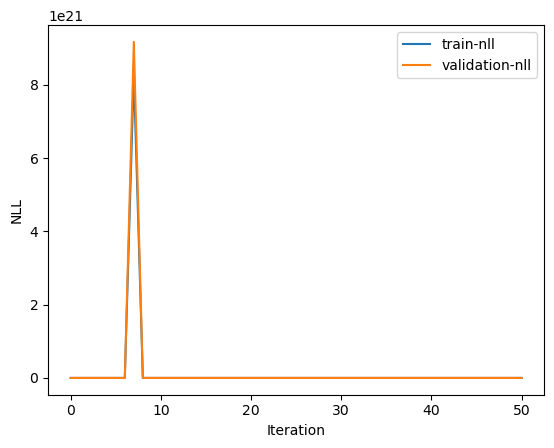

In [10]:
import matplotlib.pyplot as plt
def plot_eval(evals, catalog):
    train_len = len(catalog.train_indices)
    val_len = len(catalog.val_indices)

    train_nll = np.array(evals['train']['nll']) * (val_len/train_len)
    val_nll = np.array(evals['validation']['nll'])

    fig, ax = plt.subplots()
    ax.plot(train_nll, label = 'train-nll')
    ax.plot(val_nll, label = 'validation-nll')

    ax.set_xlabel('Iteration')
    ax.set_ylabel('NLL')
    ax.legend(loc='upper right')

plot_eval(eval_results, catalog)

In [6]:
filename = '2025_05_20-PM10_36_48_agn.fracAGN_model.pkl'

agnboost = model.AGNBoost( feature_names = catalog.get_feature_names(),
                          target_variables = {'agn.fracAGN' : 'ZABeta'},
                         )

agnboost.load_model(file_name = filename, overwrite = True)

[INFO] Features not yet created. Creating with default parameters.
[INFO] Created feature dataframe with 121 columns and 10000 rows.


True

In [38]:
print(agnboost.models['agn.fracAGN'].booster.attr('device'))

agnboost.models['agn.fracAGN'].booster.set_param( {'device': 'cpu'})

print(agnboost.models['agn.fracAGN'].booster.attr('device'))

None
None


In [9]:
preds = agnboost.predict( data = catalog, split_use = 'test', model_name = 'agn.fracAGN')

2025-05-22 13:59:36,134 - AGNBoost.AGNBoost - WARNING - Catalog object passsed. Taking the features and labels of the test set stored in the passed Catalog.
2025-05-22 13:59:36,135 - AGNBoost.Catalog - WARNING - Data has not been split. Running split_data with default parameters.


In [10]:
model_uncertainty = agnboost.prediction_uncertainty( uncertainty_type = 'model', model_name = 'agn.fracAGN', data = catalog, split_use = 'test')
print(model_uncertainty)

2025-05-22 15:31:08,675 - AGNBoost.AGNBoost - WARNING - Catalog object passsed. Taking the features and labels of the test set stored in the passed Catalog.
2025-05-22 15:31:08,675 - AGNBoost.Catalog - WARNING - Data has not been split. Running split_data with default parameters.


val
True
is cat


UnboundLocalError: cannot access local variable 'model_uncertainty' where it is not associated with a value

In [13]:
preds = agnboost.predict( data = catalog, split_use = 'test', model_name = 'agn.fracAGN')
print(preds)

2025-05-22 15:33:25,885 - AGNBoost.AGNBoost - WARNING - Catalog object passsed. Taking the features and labels of the test set stored in the passed Catalog.


[0.36136884 0.39062258 0.20277879 ... 0.98838383 0.28582408 0.79800143]


In [12]:
true_fagn = catalog.get_split_df( split_type = 'test', include_features = False, include_target = 'agn.fracAGN')


2025-05-22 13:22:12,751 - AGNBoost.Catalog - WARNING - Data has not been split. Running split_data with default parameters.


In [13]:
print(true_fagn)

7304    0.99
3524    0.90
2532    0.99
1928    0.50
4357    0.70
        ... 
839     0.40
181     0.30
480     0.00
8209    0.10
2661    0.60
Name: agn.fracAGN, Length: 2000, dtype: float64


In [5]:
mega_catalog = dataset.Catalog(path='data/raw/megav0.2_cigale_hasz_fized.txt', delimiter = " ", summarize = False)#, bands_file='allowed_bands.json')

mega_catalog.sn_cut(columns = {'jwst.miri.F770W':'jwst.miri.F770W_err',
                                  'jwst.miri.F2100W': 'jwst.miri.F2100W_err',
                                   'jwst.miri.F1500W': 'jwst.miri.F1500W_err'
                                  }, 
                        threshold = 3.0,
                       inplace = True)

mega_catalog.drop_nan(inplace = True)

2025-05-22 16:15:43,507 - AGNBoost.Catalog - WARNING - Warning: Column jwst.nircam.F115W contains non-positive values. Setting them to NaN for log calculation.
2025-05-22 16:15:43,508 - AGNBoost.Catalog - WARNING - Warning: Column jwst.nircam.F150W contains non-positive values. Setting them to NaN for log calculation.
2025-05-22 16:15:43,509 - AGNBoost.Catalog - WARNING - Warning: Column jwst.nircam.F200W contains non-positive values. Setting them to NaN for log calculation.
2025-05-22 16:15:43,509 - AGNBoost.Catalog - WARNING - Warning: Column jwst.nircam.F410M contains non-positive values. Setting them to NaN for log calculation.
2025-05-22 16:15:43,510 - AGNBoost.Catalog - WARNING - Warning: Column jwst.miri.F1500W contains non-positive values. Setting them to NaN for log calculation.
2025-05-22 16:15:43,511 - AGNBoost.Catalog - WARNING - Warning: Column jwst.miri.F2100W contains non-positive values. Setting them to NaN for log calculation.


Current working directory: /home/kurt/Documents/agnboost
Looking for bands file at: /home/kurt/Documents/agnboost/allowed_bands.json
[INFO] Loaded bands file metadata: This file contains the allowed photometric bands for JWST
[INFO] Loaded 11 allowed bands from agnboost/allowed_bands.json
[INFO] Attempting to load file with delimiter: ' '
[INFO] Successfully loaded data with 2158 rows.
[INFO] Found 11 valid band columns:
[INFO]   - jwst.nircam.F115W (F115W): 1.154 μm
[INFO]   - jwst.nircam.F150W (F150W): 1.501 μm
[INFO]   - jwst.nircam.F200W (F200W): 1.988 μm
[INFO]   - jwst.nircam.F277W (F277W): 2.776 μm
[INFO]   - jwst.nircam.F356W (F356W): 3.565 μm
[INFO]   - jwst.nircam.F410M (F410M): 4.083 μm
[INFO]   - jwst.nircam.F444W (F444W): 4.402 μm
[INFO]   - jwst.miri.F770W (F770W): 7.7 μm
[INFO]   - jwst.miri.F1000W (F1000W): 10.0 μm
[INFO]   - jwst.miri.F1500W (F1500W): 15.0 μm
[INFO]   - jwst.miri.F2100W (F2100W): 21.0 μm
[INFO] Found 2 common non-band columns: ['id', 'redshift']
[INFO]

In [8]:
mega_catalog.data.columns

Index(['id', 'redshift', 'hst.acs.wfc.F606W', 'hst.acs.wfc.F606W_err',
       'hst.acs.wfc.F814W', 'hst.acs.wfc.F814W_err', 'hst.wfc3.ir.F125W',
       'hst.wfc3.ir.F125W_err', 'hst.wfc3.ir.F140W', 'hst.wfc3.ir.F140W_err',
       'hst.wfc3.ir.F160W', 'hst.wfc3.ir.F160W_err', 'jwst.nircam.F115W',
       'jwst.nircam.F115W_err', 'jwst.nircam.F150W', 'jwst.nircam.F150W_err',
       'jwst.nircam.F200W', 'jwst.nircam.F200W_err', 'jwst.nircam.F277W',
       'jwst.nircam.F277W_err', 'jwst.nircam.F356W', 'jwst.nircam.F356W_err',
       'jwst.nircam.F410M', 'jwst.nircam.F410M_err', 'jwst.nircam.F444W',
       'jwst.nircam.F444W_err', 'jwst.miri.F770W', 'jwst.miri.F770W_err',
       'jwst.miri.F1000W', 'jwst.miri.F1000W_err', 'jwst.miri.F1500W',
       'jwst.miri.F1500W_err', 'jwst.miri.F2100W', 'jwst.miri.F2100W_err'],
      dtype='object')

In [7]:
mega_preds = agnboost.predict( data = mega_catalog, model_name = 'agn.fracAGN')

2025-05-22 16:15:52,455 - AGNBoost.AGNBoost - WARNING - Catalog object passsed. Taking the features and labels of the None set stored in the passed Catalog.


[INFO] Features not yet created. Creating with default parameters.
[INFO] Created feature dataframe with 121 columns and 698 rows.


In [17]:
dict = {'test':0, 'no':1}
print( dict.keys()[0])

TypeError: 'dict_keys' object is not subscriptable

In [11]:
model_uncertainty = agnboost.prediction_uncertainty( uncertainty_type = 'model', model_name = 'agn.fracAGN', catalog = mega_catalog)

2025-05-22 16:17:18,050 - AGNBoost.AGNBoost - WARNING - Catalog object passsed. Taking the features and labels of the None set stored in the passed Catalog.
Processing truncated model uncertainty:   3%|  | 18/698 [00:08<05:20,  2.12it/s]


KeyboardInterrupt: 

In [29]:
model_uncertainty = agnboost.prediction_uncertainty( uncertainty_type = 'photometric', model_name = 'agn.fracAGN', catalog = mega_catalog)

2025-05-22 17:03:10,747 - AGNBoost.AGNBoost - WARNING - Catalog object passsed. Taking the features and labels of the None set stored in the passed Catalog.


[INFO] Processing uncertainty due to photometric uncertainty with 100 trials per source.


  1%|▍                                          | 7/698 [00:30<50:10,  4.36s/it]

[INFO] Negative monte carlo fluxes at index 6 in bands ['jwst.miri.F1000W'] with S/N ['1.59']. Monte carlo procedure was repeated until positive flux returned at each iteration.


  4%|█▊                                        | 30/698 [02:11<49:04,  4.41s/it]

[INFO] Negative monte carlo fluxes at index 29 in bands ['jwst.miri.F1000W'] with S/N ['1.60']. Monte carlo procedure was repeated until positive flux returned at each iteration.


  6%|██▋                                       | 45/698 [03:11<42:08,  3.87s/it]

[INFO] Negative monte carlo fluxes at index 44 in bands ['jwst.miri.F1000W'] with S/N ['3.36']. Monte carlo procedure was repeated until positive flux returned at each iteration.


  9%|███▊                                      | 64/698 [04:26<41:30,  3.93s/it]

[INFO] Negative monte carlo fluxes at index 63 in bands ['jwst.miri.F1000W'] with S/N ['2.24']. Monte carlo procedure was repeated until positive flux returned at each iteration.


 10%|████▍                                     | 73/698 [05:01<40:33,  3.89s/it]

[INFO] Negative monte carlo fluxes at index 72 in bands ['jwst.nircam.F115W'] with S/N ['2.18']. Monte carlo procedure was repeated until positive flux returned at each iteration.


 12%|█████                                     | 85/698 [05:48<39:50,  3.90s/it]

[INFO] Negative monte carlo fluxes at index 84 in bands ['jwst.miri.F1000W'] with S/N ['1.34']. Monte carlo procedure was repeated until positive flux returned at each iteration.


 26%|██████████▋                              | 182/698 [12:42<38:46,  4.51s/it]

[INFO] Negative monte carlo fluxes at index 181 in bands ['jwst.miri.F1000W'] with S/N ['1.70']. Monte carlo procedure was repeated until positive flux returned at each iteration.


 27%|██████████▉                              | 187/698 [13:03<35:28,  4.17s/it]

[INFO] Negative monte carlo fluxes at index 186 in bands ['jwst.nircam.F115W'] with S/N ['0.94']. Monte carlo procedure was repeated until positive flux returned at each iteration.


 30%|████████████                             | 206/698 [14:19<32:28,  3.96s/it]

[INFO] Negative monte carlo fluxes at index 205 in bands ['jwst.miri.F1000W'] with S/N ['1.68']. Monte carlo procedure was repeated until positive flux returned at each iteration.


 32%|█████████████                            | 222/698 [15:23<31:43,  4.00s/it]

[INFO] Negative monte carlo fluxes at index 221 in bands ['jwst.miri.F1000W'] with S/N ['1.38']. Monte carlo procedure was repeated until positive flux returned at each iteration.


 32%|█████████████                            | 223/698 [15:27<32:10,  4.06s/it]

[INFO] Negative monte carlo fluxes at index 222 in bands ['jwst.miri.F1000W'] with S/N ['1.56']. Monte carlo procedure was repeated until positive flux returned at each iteration.


 33%|█████████████▍                           | 229/698 [15:52<33:10,  4.24s/it]

[INFO] Negative monte carlo fluxes at index 228 in bands ['jwst.miri.F1000W'] with S/N ['0.42']. Monte carlo procedure was repeated until positive flux returned at each iteration.


 33%|█████████████▌                           | 230/698 [15:56<33:23,  4.28s/it]

[INFO] Negative monte carlo fluxes at index 229 in bands ['jwst.miri.F1000W'] with S/N ['1.97']. Monte carlo procedure was repeated until positive flux returned at each iteration.


 34%|██████████████                           | 239/698 [16:35<32:06,  4.20s/it]

[INFO] Negative monte carlo fluxes at index 238 in bands ['jwst.miri.F1000W'] with S/N ['2.15']. Monte carlo procedure was repeated until positive flux returned at each iteration.


 34%|██████████████                           | 240/698 [16:40<32:35,  4.27s/it]

[INFO] Negative monte carlo fluxes at index 239 in bands ['jwst.nircam.F115W'] with S/N ['1.21']. Monte carlo procedure was repeated until positive flux returned at each iteration.


 35%|██████████████▏                          | 242/698 [16:48<32:18,  4.25s/it]

[INFO] Negative monte carlo fluxes at index 241 in bands ['jwst.miri.F1000W'] with S/N ['1.67']. Monte carlo procedure was repeated until positive flux returned at each iteration.


 37%|██████████████▉                          | 255/698 [17:48<33:02,  4.48s/it]

[INFO] Negative monte carlo fluxes at index 254 in bands ['jwst.miri.F1000W'] with S/N ['1.58']. Monte carlo procedure was repeated until positive flux returned at each iteration.


 39%|████████████████                         | 274/698 [19:13<28:36,  4.05s/it]

[INFO] Negative monte carlo fluxes at index 273 in bands ['jwst.miri.F1000W'] with S/N ['1.70']. Monte carlo procedure was repeated until positive flux returned at each iteration.


 42%|█████████████████                        | 290/698 [20:17<26:33,  3.91s/it]

[INFO] Negative monte carlo fluxes at index 289 in bands ['jwst.miri.F1000W'] with S/N ['2.55']. Monte carlo procedure was repeated until positive flux returned at each iteration.


 42%|█████████████████▏                       | 292/698 [20:24<26:19,  3.89s/it]

[INFO] Negative monte carlo fluxes at index 291 in bands ['jwst.miri.F1000W'] with S/N ['0.34']. Monte carlo procedure was repeated until positive flux returned at each iteration.


 43%|█████████████████▌                       | 298/698 [20:48<25:48,  3.87s/it]

[INFO] Negative monte carlo fluxes at index 297 in bands ['jwst.miri.F1000W'] with S/N ['2.07']. Monte carlo procedure was repeated until positive flux returned at each iteration.


 45%|██████████████████▌                      | 315/698 [21:55<26:48,  4.20s/it]

[INFO] Negative monte carlo fluxes at index 314 in bands ['jwst.miri.F1000W'] with S/N ['1.22']. Monte carlo procedure was repeated until positive flux returned at each iteration.


 47%|███████████████████▍                     | 330/698 [23:02<26:58,  4.40s/it]

[INFO] Negative monte carlo fluxes at index 329 in bands ['jwst.miri.F1000W'] with S/N ['2.93']. Monte carlo procedure was repeated until positive flux returned at each iteration.


 49%|███████████████████▉                     | 340/698 [23:46<26:19,  4.41s/it]

[INFO] Negative monte carlo fluxes at index 339 in bands ['jwst.miri.F1000W'] with S/N ['2.69']. Monte carlo procedure was repeated until positive flux returned at each iteration.


 53%|█████████████████████▌                   | 368/698 [25:47<23:27,  4.27s/it]

[INFO] Negative monte carlo fluxes at index 367 in bands ['jwst.miri.F1500W'] with S/N ['3.32']. Monte carlo procedure was repeated until positive flux returned at each iteration.


 55%|██████████████████████▌                  | 385/698 [27:00<22:42,  4.35s/it]

[INFO] Negative monte carlo fluxes at index 384 in bands ['jwst.miri.F1000W'] with S/N ['2.31']. Monte carlo procedure was repeated until positive flux returned at each iteration.


 56%|███████████████████████▏                 | 394/698 [27:46<25:23,  5.01s/it]

[INFO] Negative monte carlo fluxes at index 393 in bands ['jwst.miri.F2100W'] with S/N ['3.25']. Monte carlo procedure was repeated until positive flux returned at each iteration.


 57%|███████████████████████▎                 | 397/698 [28:00<24:01,  4.79s/it]

[INFO] Negative monte carlo fluxes at index 396 in bands ['jwst.miri.F1000W'] with S/N ['2.11']. Monte carlo procedure was repeated until positive flux returned at each iteration.


 58%|███████████████████████▋                 | 404/698 [28:33<22:57,  4.69s/it]

[INFO] Negative monte carlo fluxes at index 403 in bands ['jwst.miri.F1000W'] with S/N ['1.09']. Monte carlo procedure was repeated until positive flux returned at each iteration.


 58%|███████████████████████▊                 | 406/698 [28:42<23:08,  4.76s/it]

[INFO] Negative monte carlo fluxes at index 405 in bands ['jwst.miri.F1000W'] with S/N ['1.42']. Monte carlo procedure was repeated until positive flux returned at each iteration.


 58%|███████████████████████▉                 | 407/698 [28:47<22:50,  4.71s/it]

[INFO] Negative monte carlo fluxes at index 406 in bands ['jwst.miri.F1000W'] with S/N ['1.40']. Monte carlo procedure was repeated until positive flux returned at each iteration.


 59%|████████████████████████                 | 409/698 [28:56<22:22,  4.64s/it]

[INFO] Negative monte carlo fluxes at index 408 in bands ['jwst.miri.F1000W'] with S/N ['2.72']. Monte carlo procedure was repeated until positive flux returned at each iteration.


 59%|████████████████████████▎                | 414/698 [29:21<22:51,  4.83s/it]

[INFO] Negative monte carlo fluxes at index 413 in bands ['jwst.miri.F1000W'] with S/N ['1.09']. Monte carlo procedure was repeated until positive flux returned at each iteration.


 59%|████████████████████████▍                | 415/698 [29:25<22:32,  4.78s/it]

[INFO] Negative monte carlo fluxes at index 414 in bands ['jwst.miri.F1000W'] with S/N ['1.04']. Monte carlo procedure was repeated until positive flux returned at each iteration.


 60%|████████████████████████▍                | 416/698 [29:30<22:14,  4.73s/it]

[INFO] Negative monte carlo fluxes at index 415 in bands ['jwst.nircam.F150W'] with S/N ['1.95']. Monte carlo procedure was repeated until positive flux returned at each iteration.


 62%|█████████████████████████▌               | 436/698 [31:00<19:08,  4.38s/it]

[INFO] Negative monte carlo fluxes at index 435 in bands ['jwst.miri.F1000W'] with S/N ['0.58']. Monte carlo procedure was repeated until positive flux returned at each iteration.


 63%|█████████████████████████▉               | 441/698 [31:24<20:38,  4.82s/it]

[INFO] Negative monte carlo fluxes at index 440 in bands ['jwst.miri.F1000W'] with S/N ['2.07']. Monte carlo procedure was repeated until positive flux returned at each iteration.


 66%|███████████████████████████▎             | 464/698 [33:06<17:17,  4.43s/it]

[INFO] Negative monte carlo fluxes at index 463 in bands ['jwst.miri.F1000W'] with S/N ['0.21']. Monte carlo procedure was repeated until positive flux returned at each iteration.


 67%|███████████████████████████▎             | 465/698 [33:10<17:21,  4.47s/it]

[INFO] Negative monte carlo fluxes at index 464 in bands ['jwst.miri.F2100W'] with S/N ['3.06']. Monte carlo procedure was repeated until positive flux returned at each iteration.


 69%|████████████████████████████▎            | 481/698 [34:26<16:26,  4.55s/it]

[INFO] Negative monte carlo fluxes at index 480 in bands ['jwst.miri.F1000W'] with S/N ['1.67']. Monte carlo procedure was repeated until positive flux returned at each iteration.


 71%|████████████████████████████▉            | 493/698 [35:19<15:00,  4.39s/it]

[INFO] Negative monte carlo fluxes at index 492 in bands ['jwst.nircam.F115W', 'jwst.nircam.F150W', 'jwst.nircam.F200W', 'jwst.nircam.F277W', 'jwst.nircam.F356W', 'jwst.nircam.F410M', 'jwst.nircam.F444W'] with S/N ['0.04', '0.06', '0.11', '0.07', '0.02', '0.02', '0.45']. Monte carlo procedure was repeated until positive flux returned at each iteration.


 73%|██████████████████████████████▏          | 513/698 [36:42<12:21,  4.01s/it]

[INFO] Negative monte carlo fluxes at index 512 in bands ['jwst.miri.F1000W'] with S/N ['2.21']. Monte carlo procedure was repeated until positive flux returned at each iteration.


 76%|███████████████████████████████          | 529/698 [37:49<12:02,  4.27s/it]

[INFO] Negative monte carlo fluxes at index 528 in bands ['jwst.miri.F1000W'] with S/N ['0.69']. Monte carlo procedure was repeated until positive flux returned at each iteration.


 77%|███████████████████████████████▋         | 540/698 [38:44<14:11,  5.39s/it]

[INFO] Negative monte carlo fluxes at index 539 in bands ['jwst.miri.F1000W'] with S/N ['1.25']. Monte carlo procedure was repeated until positive flux returned at each iteration.


 81%|█████████████████████████████████        | 562/698 [40:47<12:15,  5.41s/it]

[INFO] Negative monte carlo fluxes at index 561 in bands ['jwst.miri.F1500W'] with S/N ['3.33']. Monte carlo procedure was repeated until positive flux returned at each iteration.


 85%|██████████████████████████████████▉      | 595/698 [43:36<08:10,  4.77s/it]

[INFO] Negative monte carlo fluxes at index 594 in bands ['jwst.miri.F1000W'] with S/N ['0.97']. Monte carlo procedure was repeated until positive flux returned at each iteration.


 89%|████████████████████████████████████▍    | 620/698 [45:57<07:45,  5.97s/it]

[INFO] Negative monte carlo fluxes at index 619 in bands ['jwst.miri.F2100W'] with S/N ['3.03']. Monte carlo procedure was repeated until positive flux returned at each iteration.


 92%|█████████████████████████████████████▋   | 641/698 [47:33<03:48,  4.01s/it]

[INFO] Negative monte carlo fluxes at index 640 in bands ['jwst.miri.F1000W'] with S/N ['2.29']. Monte carlo procedure was repeated until positive flux returned at each iteration.


 92%|█████████████████████████████████████▋   | 642/698 [47:37<03:42,  3.98s/it]

[INFO] Negative monte carlo fluxes at index 641 in bands ['jwst.miri.F1000W'] with S/N ['1.98']. Monte carlo procedure was repeated until positive flux returned at each iteration.


 95%|███████████████████████████████████████  | 665/698 [49:08<02:11,  3.98s/it]

[INFO] Negative monte carlo fluxes at index 664 in bands ['jwst.miri.F1000W'] with S/N ['3.22']. Monte carlo procedure was repeated until positive flux returned at each iteration.


 97%|███████████████████████████████████████▋ | 676/698 [49:52<01:27,  3.98s/it]

[INFO] Negative monte carlo fluxes at index 675 in bands ['jwst.miri.F1000W'] with S/N ['1.70']. Monte carlo procedure was repeated until positive flux returned at each iteration.


 97%|███████████████████████████████████████▊ | 677/698 [49:56<01:23,  3.97s/it]

[INFO] Negative monte carlo fluxes at index 676 in bands ['jwst.miri.F1000W'] with S/N ['0.52']. Monte carlo procedure was repeated until positive flux returned at each iteration.


 99%|████████████████████████████████████████▍| 689/698 [50:43<00:36,  4.00s/it]

[INFO] Negative monte carlo fluxes at index 688 in bands ['jwst.miri.F1000W'] with S/N ['2.12']. Monte carlo procedure was repeated until positive flux returned at each iteration.


100%|█████████████████████████████████████████| 698/698 [51:20<00:00,  4.41s/it]


UnboundLocalError: cannot access local variable 'model_uncertainty' where it is not associated with a value

In [45]:
catalog.get_valid_bands_list()

['jwst.nircam.F115W',
 'jwst.nircam.F150W',
 'jwst.nircam.F200W',
 'jwst.nircam.F277W',
 'jwst.nircam.F356W',
 'jwst.nircam.F410M',
 'jwst.nircam.F444W',
 'jwst.miri.F770W',
 'jwst.miri.F1000W',
 'jwst.miri.F1500W',
 'jwst.miri.F2100W']

In [44]:
catalog.data.shape

(10000, 26)